# Statistics Assignment-2 (CIs & Hypothesis) (DS-DE4 TR)

CONFIDENCE INTERVALS

EXERCISE 1 

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
import scipy.stats as stats
from math import sqrt

In [3]:
sem = 0.73/130**0.5
sem

0.06402523540941313

In [4]:
moe = 2.33 * sem
print(moe)
print(98.25-moe)
print(98.25+moe)

0.1491787985039326
98.10082120149606
98.39917879850394


In [5]:
print(f"With a 99% confidence interval, the average body temperature of healthy people is between {98.25-moe} and {98.25+moe}.")

With a 99% confidence interval, the average body temperature of healthy people is between 98.10082120149606 and 98.39917879850394.


In [6]:
#Solution 2

ci_z1 = stats.norm.interval(0.99, loc = 98.25, scale = sem)
ci_z1

(98.08508192246582, 98.41491807753418)

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [7]:
sem = 3.1/500**0.5
sem

0.13863621460498696

In [8]:
ci_z2 = stats.norm.interval(0.95, loc = 5.4, scale = sem)
ci_z2

(5.12827801242126, 5.67172198757874)



HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [ ]:
!pip install statsmodels
import statsmodels.api as sm

In [10]:
x_bar = 12.20 # sample mean 
n = 40 # number of samples
sigma = 2.50 # sd of population
mu = 13.20 # Population mean 

In [11]:
# Ho: mu >= 13.20
# Ha: mu < 13.20

In [13]:
z = (x_bar - mu)/(sigma/sqrt(n))
z

-2.5298221281347035

In [15]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [78]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [21]:
import pandas as pd
df = pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2

In [29]:
leveneTest = stats.levene(df.Soil1.iloc[:30], df.Soil2)
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [ ]:
# pvalue > 0.05, thus we consider that two variances are equal.

In [83]:
st_test = stats.ttest_ind(df.Soil1.iloc[:30], df.Soil2, equal_var = True, alternative='two-sided')
st_test

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [84]:
alpha = 0.01

if st_test.pvalue<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [57]:
pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [ ]:
pisa[pisa.Continent_Code=="AS"].describe()

In [ ]:
pisa[pisa.Continent_Code=="EU"].describe()

In [ ]:
pisa[pisa.Continent_Code=="AF"].describe()

In [ ]:
pisa[pisa.Continent_Code=="NA"].describe()

In [ ]:
pisa[pisa.Continent_Code=="SA"].describe()

In [ ]:
pisa[pisa.Continent_Code=="OC"].describe()

In [ ]:
# H0: mu(EU_Math) = mu(AS_Math)
# Ha: mu(EU_Math) != mu(AS_Math)

In [87]:
test_pisa = stats.ttest_ind(pisa[pisa.Continent_Code=="EU"].Math, pisa[pisa.Continent_Code=="AS"].Math, equal_var = True)
test_pisa

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [88]:
alpha = 0.05

if test_pisa.pvalue<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


In [90]:
import seaborn as sns

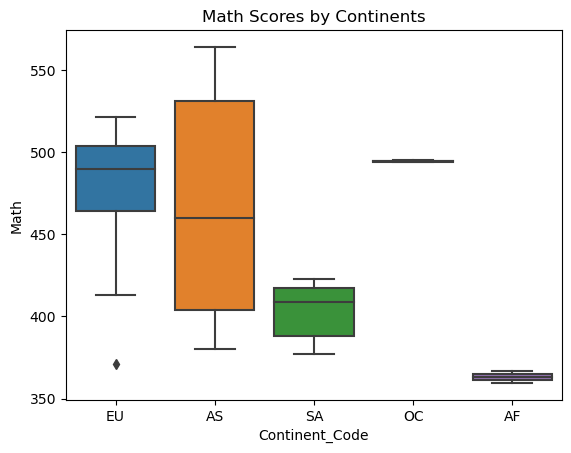

In [106]:
sns.boxplot(x = "Continent_Code", y = "Math", data=pisa)
plt.title("Math Scores by Continents")
plt.show()

In [94]:
import matplotlib
import matplotlib.pyplot as plt  
# %matplotlib inline 

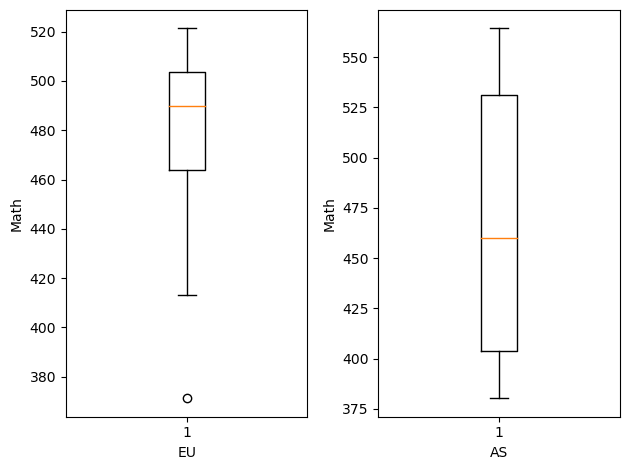

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].boxplot(pisa[pisa.Continent_Code=="EU"].Math)
ax[0].set_xlabel("EU")
ax[0].set_ylabel("Math")

ax[1].boxplot(pisa[pisa.Continent_Code=="AS"].Math)
ax[1].set_xlabel("AS")
ax[1].set_ylabel("Math")

plt.tight_layout()